In [2]:
import os
from pymongo import MongoClient
import matplotlib.pyplot as plt
from pymongo import MongoClient
import pandas as pd
import base64
import numpy as np
import io
from PIL import Image

In [3]:
client = MongoClient('localhost', 27017)
db = client['lungcancer']

In [3]:
# # Kết nối tới MongoDB


# # Thư mục chứa các thư mục con chứa ảnh
# data_directory = 'D:\DOWLOADS\\archive (17)\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset'

# # Lặp qua tất cả các thư mục con trong thư mục dữ liệu
# for folder_name in os.listdir(data_directory):
#     folder_path = os.path.join(data_directory, folder_name)
#     if os.path.isdir(folder_path):
#         # Tạo một collection mới cho mỗi thư mục con
#         collection_name = folder_name.replace(' ', '_').lower()  # sử dụng tên thư mục làm tên collection
#         collection = db[collection_name]

#         # Lặp qua tất cả các tệp trong thư mục con và lưu chúng vào collection tương ứng
#         for filename in os.listdir(folder_path):
#             if filename.endswith('.jpg') or filename.endswith('.png'):  # chỉ xử lý các tệp ảnh có phần mở rộng là .jpg hoặc .png
#                 with open(os.path.join(folder_path, filename), 'rb') as f:
#                     image_data = f.read()
#                     # Lưu dữ liệu ảnh vào MongoDB
#                     filename = filename.replace('.png', '')
#                     image_doc = {"filename": filename, "data": image_data}
#                     collection.insert_one(image_doc)
#                     print(f"Lưu ảnh {filename} của thư mục {folder_name} vào MongoDB")

# print("Hoàn thành việc lưu ảnh")


Lưu ảnh Bengin case (1).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (10).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (100).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (101).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (102).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (103).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (104).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (105).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (106).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (107).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (108).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (109).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (11).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (110).jpg của thư mục Bengin cases vào MongoDB
Lưu ảnh Bengin case (111).jpg của thư mục Bengin cases vào MongoDB

In [4]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('localhost', 27017)
db = client['lungcancer']

# Get the names of all collections in the database
collection_names = db.list_collection_names()
all_filenames = []
# Iterate over each collection and retrieve all documents
for collection_name in collection_names:
    # Access the collection object
    collection = db[collection_name]

    # Get all documents from the collection
    all_elements = collection.find({})

    # Loop through each document and print it
    for element in all_elements:
        all_filenames.append(element['filename'])
print(all_filenames)


['Normal case (1).jpg', 'Normal case (10).jpg', 'Normal case (100).jpg', 'Normal case (101).jpg', 'Normal case (102).jpg', 'Normal case (103).jpg', 'Normal case (104).jpg', 'Normal case (105).jpg', 'Normal case (106).jpg', 'Normal case (107).jpg', 'Normal case (108).jpg', 'Normal case (109).jpg', 'Normal case (11).jpg', 'Normal case (110).jpg', 'Normal case (111).jpg', 'Normal case (112).jpg', 'Normal case (113).jpg', 'Normal case (114).jpg', 'Normal case (115).jpg', 'Normal case (116).jpg', 'Normal case (117).jpg', 'Normal case (118).jpg', 'Normal case (119).jpg', 'Normal case (12).jpg', 'Normal case (120).jpg', 'Normal case (121).jpg', 'Normal case (122).jpg', 'Normal case (123).jpg', 'Normal case (124).jpg', 'Normal case (125).jpg', 'Normal case (126).jpg', 'Normal case (127).jpg', 'Normal case (128).jpg', 'Normal case (129).jpg', 'Normal case (13).jpg', 'Normal case (130).jpg', 'Normal case (131).jpg', 'Normal case (132).jpg', 'Normal case (133).jpg', 'Normal case (134).jpg', 'Norm

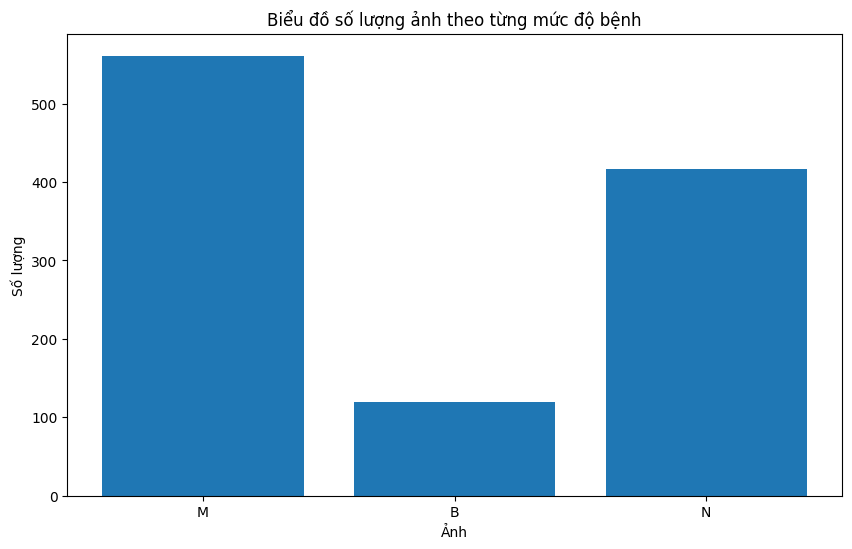

In [5]:
for i in range(len(all_filenames)):
    all_filenames[i] = all_filenames[i][0]
dict = {}
for i in list(set(all_filenames)):
    dict[i] = all_filenames.count(i)
# Chuyển dữ liệu từ từ điển thành mảng NumPy
labels, counts = zip(*dict.items())
labels = np.array(labels)
counts = np.array(counts)

# Vẽ đồ thị cột
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Ảnh')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng ảnh theo từng mức độ bệnh')
plt.show()


In [6]:
# Danh sách các lớp ảnh
img_classes = ["bengin_cases", "malignant_cases", "normal_cases"]
img_class_labels = ["Bengin cases", "Malignant cases", "Normal cases"]

# Danh sách để lưu đường dẫn ảnh và nhãn
img_path = []
class_labels = []

# Duyệt qua từng bộ sưu tập
for img_class, label in zip(img_classes, img_class_labels):
    collection = db[img_class]
    documents = collection.find({})
    for doc in documents:
        # Lưu đường dẫn ảnh (hoặc tên file) và nhãn
        img_path.append(doc['filename'])
        class_labels.append(label)

# Tạo DataFrame từ danh sách
df = pd.DataFrame({"img_path": img_path, "label": class_labels})

# Hiển thị dữ liệu
print(df.head())

                img_path         label
0    Bengin case (1).jpg  Bengin cases
1   Bengin case (10).jpg  Bengin cases
2  Bengin case (100).jpg  Bengin cases
3  Bengin case (101).jpg  Bengin cases
4  Bengin case (102).jpg  Bengin cases


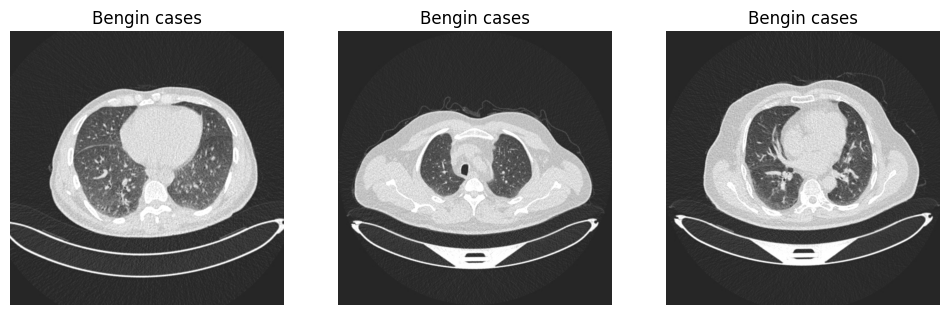

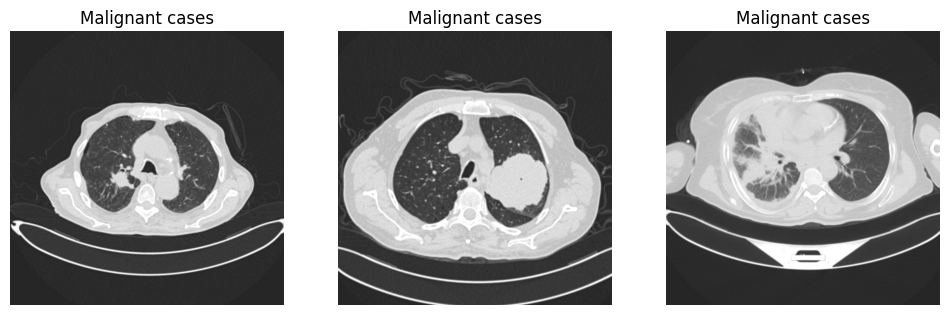

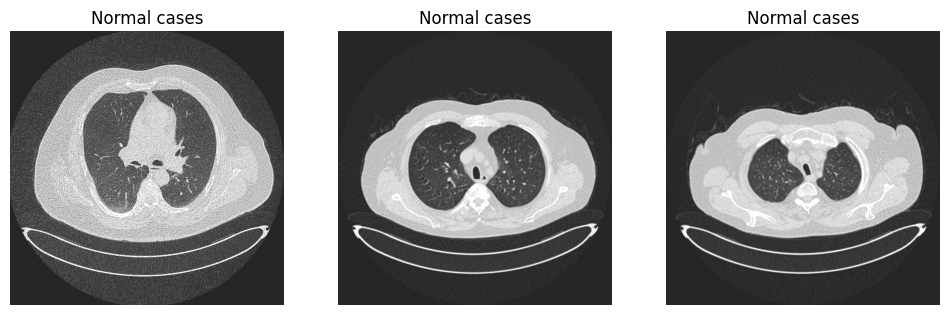

In [7]:
import cv2
# Danh sách để lưu tên file ảnh và nhãn
img_path = []
class_labels = []

# Duyệt qua từng bộ sưu tập
for img_class, label in zip(img_classes, img_class_labels):
    collection = db[img_class]
    documents = collection.find({})
    for doc in documents:
        # Lưu tên file ảnh và nhãn
        img_path.append(doc['_id'])  # Sử dụng _id để truy vấn lại dữ liệu ảnh
        class_labels.append(label)

# Tạo DataFrame từ danh sách
df = pd.DataFrame({"img_path": img_path, "label": class_labels})

# In ảnh ra từ database
for category, group in df.groupby("label"):
    fig, ax = plt.subplots(1, 3, figsize=(12, 12))
    ax = ax.ravel()
    for i, (_, r) in enumerate(group.sample(3).iterrows()):
        # Truy vấn ảnh từ MongoDB bằng _id
        collection_name = category.replace(' ', '_').lower()
        collection = db[collection_name]
        image_doc = collection.find_one({"_id": r.img_path})
        
        # Chuyển đổi dữ liệu ảnh từ nhị phân sang định dạng có thể hiển thị
        img_data = np.frombuffer(image_doc['data'], np.uint8)
        img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
        
        # Hiển thị ảnh
        ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i].axis("off")
        ax[i].set_title(r.label)
    plt.show()

In [8]:
# Danh sách để lưu các đặc trưng
sizes = []
resolutions = []
color_distributions = []

# Duyệt qua từng bộ sưu tập
for img_class, label in zip(img_classes, img_class_labels):
    collection = db[img_class]
    documents = collection.find({})
    for doc in documents:
        # Lấy dữ liệu ảnh từ MongoDB
        image_doc = collection.find_one({"_id": doc['_id']})
        img_data = np.frombuffer(image_doc['data'], np.uint8)
        img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
        
        # Lấy kích thước ảnh
        size = len(img_data)
        sizes.append(size)
        
        # Lấy độ phân giải ảnh
        resolution = img.shape[:2]
        resolutions.append(resolution)
        
        # Lấy phân phối màu sắc
        mean_color_distributions = np.bincount(img.flatten(), minlength=256)
        color_distributions.append(mean_color_distributions)

# Chuyển danh sách thành mảng numpy
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

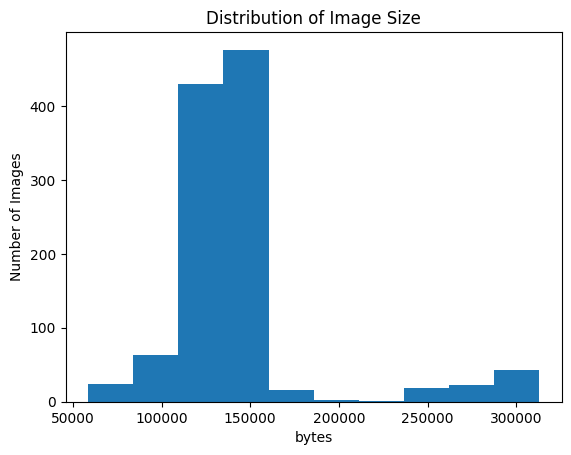

In [9]:
plt.hist(sizes)
plt.title("Distribution of Image Size")
plt.xlabel("bytes")
plt.ylabel("Number of Images")
plt.show()

In [10]:
import plotly.express as px
# Danh sách để lưu kích thước ảnh (theo MB)
sizes_MB = []

# Duyệt qua từng bộ sưu tập
for img_class, label in zip(img_classes, img_class_labels):
    collection = db[img_class]
    documents = collection.find({})
    for doc in documents:
        # Lấy dữ liệu ảnh từ MongoDB
        image_doc = collection.find_one({"_id": doc['_id']})
        img_data = np.frombuffer(image_doc['data'], np.uint8)
        
        # Tính kích thước ảnh (theo MB)
        size_MB = len(img_data) / 1_000_000
        sizes_MB.append(size_MB)

# Vẽ biểu đồ phân phối kích thước ảnh
fig = px.histogram(x=sizes_MB, nbins=50, title="Distribution of Image Sizes")
fig.update_layout(xaxis_title="File Size (MB)",
                  yaxis_title="Number of Images",
                  showlegend=False,
                  bargap=0.1,
                  bargroupgap=0.1)

# Sửa lỗi bằng cách đổi tên biến dict thành một cái tên khác
fig.update_traces(marker={'color': 'green'})  # Đổi tên biến dict thành marker_style
fig.show()

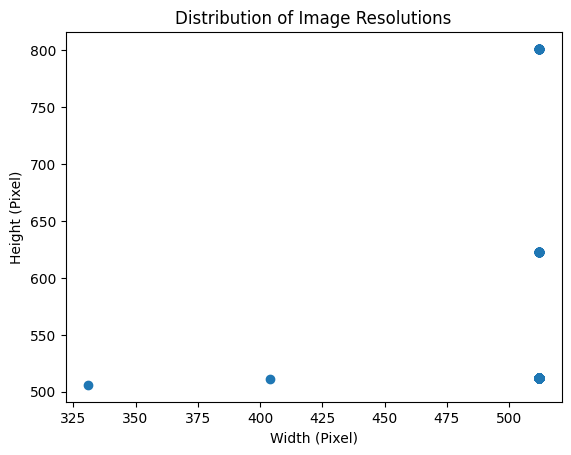

In [11]:
plt.scatter(resolutions[:,0], resolutions[:,1])
plt.title("Distribution of Image Resolutions")
plt.ylabel("Height (Pixel)")
plt.xlabel("Width (Pixel)")
plt.show()

In [13]:
fig = px.scatter(x = resolutions[:,0], y = resolutions[:,1], title = "Distribution of Image Resolution")
fig.update_layout(
    xaxis_title = "Width (Pixel)",
    yaxis_title = "Height (Pixel)",
    showlegend = False,
    hovermode = "closest"
)
fig.update_traces(marker={'color': 'red'})
fig.show()

In [14]:
import plotly.graph_objects as go
mean_color_distributions = np.mean(color_distributions, axis = 0)
fig = go.Figure(
    go.Bar(x = np.arange(256), y = mean_color_distributions, name = "Mean Color Distributions"
))
fig.update_layout(
    title = "Mean Color Distribution",
    xaxis_title = "Color Values",
    yaxis_title = "Number of Pixel"
)
fig.show()